## Vědecká knihovna SciPy
Rozšířené funkce pro vědecké výpočty a numerickou analýzu

- staví na NumPy
- několik modulů
    - algoritmy pro clusterové výpočty
    - fyzikální a matematické konstanty
    - Fourierova transformace
    - integrace a obyčejné diferenciální funkce
    - interpolace
    - import a export dat z Matlabu
    - lineární algebra
    - zpracování signálu a obrazu
    - regrese
    - optimalizace a hledání kořenů
    - řídké matice
    - prostorové datové struktury
    - speciální funkce
    - statistika

https://docs.scipy.org/doc/scipy/tutorial/general.html

In [ ]:
!python -m pip install scipy

In [2]:
import scipy

## Modul Special

Např. Besselovy funkce v modulu scipy.special

In [2]:
import scipy.special
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, scipy.special.jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, scipy.special.yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


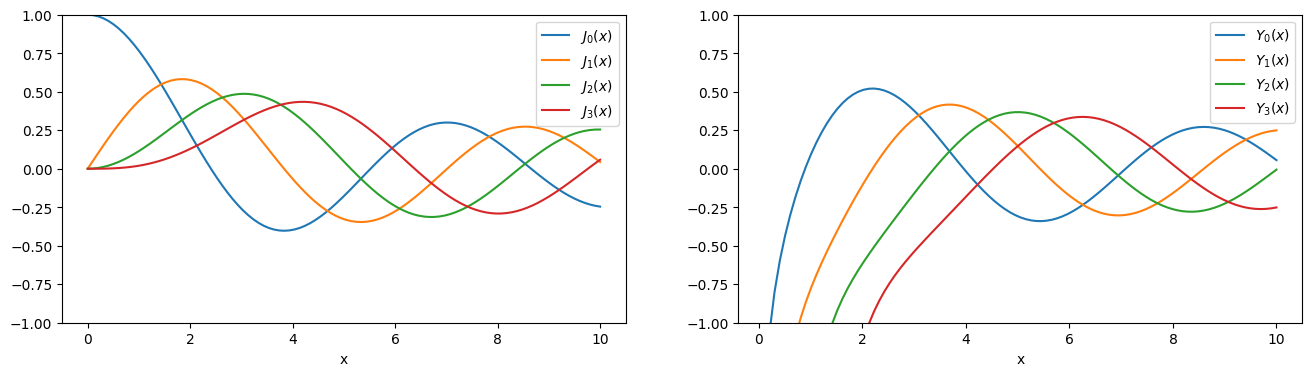

In [5]:
import numpy
import matplotlib.pyplot as plt
x = numpy.linspace(0, 10, 100)

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for i, (func, label) in enumerate(zip((scipy.special.jn, scipy.special.yn), (r"$J_%d(x)$", r"$Y_%d(x)$"))):
    for n in range(4):
        ax[i].plot(x, func(n, x), label=label % n)
    ax[i].legend(loc="best")
    ax[i].set_xlabel("x")
    ax[i].set_ylim(-1, 1)

## Derivace
např. $f(x)=2x/(1-x^2)$ v bodě $x=3$

In [4]:
import scipy.misc
def f(x):                           # definice funkce
    return (2*x) / (1-(x**2))
result = scipy.misc.derivative(f, 3, dx=1e-6) # funkce, v bodě, diference
print(result)
print(scipy.misc.derivative(f, 3, 1e-0))      # menší přesnost


0.3125000000436806
0.39999999999999997


## Integrace
- určitý integrál
- řešení obyčejných diferenciálních rovnic

In [ ]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: 4, 0, 2)  # konstantní funkce y = 4, od 0 do 2
# (Fortran library QUADPACK)
print(result)
result = integrate.quad(lambda x: x, 0, 2)  # lineární funkce y = x, od 0 do 2
print(result)                               # výsledek, chyba

(8.0, 8.881784197001252e-14)
(2.0, 2.220446049250313e-14)


Dvojný integrál

In [ ]:
import scipy.integrate, math
def funkce(x, y):
    return (x**2) * y * (math.exp(x*y))
result = scipy.integrate.dblquad(funkce, 0, 2, 0, 1)      # x od 0 do 2, y od 0 do 1
result

(2.0, 3.526464691694632e-14)

## Interpolace

In [3]:
from scipy.interpolate import interp1d
import numpy

In [4]:
x = numpy.linspace(0, 10, num=11, endpoint=True)    # body 0 až 10
y = numpy.cos(-x**2/9.0)                            # pole funkčních hodnot
f = interp1d(x, y)                                  # lineární interpolace
f2 = interp1d(x, y, kind='cubic')                   # kubická
display(y)
f(x)

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995])

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995])

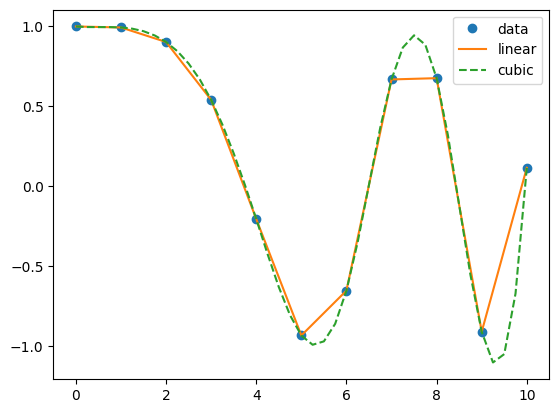

In [11]:
xnew = numpy.linspace(0, 10, num=41, endpoint=True)     # jemnější dělení
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## Fourierova transformace

In [1]:
from scipy.fft import fft
signal = [1, 2, 3, 4]
transformed = fft(signal)
print(transformed)

[10.-0.j -2.+2.j -2.-0.j -2.-2.j]


In [5]:
import numpy
from scipy.fft import fft, ifft
x = numpy.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print(y)
yinv = ifft(y)
yinv

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [68]:
import numpy
from scipy.fft import fft, fftfreq

n = 60           # Počet vzorků
T = 1.0 / 500.0  # Perioda vzorkování (odpovídá vzorkovací frekvenci 500 Hz)
x = numpy.linspace(0.0, n*T, n, endpoint=False)  # Časová osa
y = numpy.sin(50.0 * 2.0 * numpy.pi * x)         # Signál s frekvencí 50 Hz

# Výpočet FFT a frekvencí
yf = fft(y)                              # FFT signálu
# komplexní pole, které reprezentuje amplitudu a fázi různých frekvenčních složek
xf = fftfreq(n, T)                       # Frekvenční osa

# výpis
numpy.set_printoptions(precision=2)
print("Frekvence, v rozmezí od 0 do fs/2 (kladné frekvence) a od -fs/2 zpět do 0 (záporné frekvence)")
print(xf)
print("Komplexní pole amplitud (prvních 6 hodnot)")
print(yf[:6])

# Omezení na kladné frekvence
xf = xf[:n//2]                           # Kladné frekvence
yf = 2.0 / n * numpy.abs(yf[:n//2])      # Normalizace amplitudy
# abs. hodnota reprezentuje amplitudy jednotlivých frekvencí

# výpis
print("\nNezáporné frekvence")
print(xf)
print("Pole amplitud")
print(yf)
numpy.set_printoptions(precision=10)


Frekvence, v rozmezí od 0 do fs/2 (kladné frekvence) a od -fs/2 zpět do 0 (záporné frekvence)
[   0.      8.33   16.67   25.     33.33   41.67   50.     58.33   66.67
   75.     83.33   91.67  100.    108.33  116.67  125.    133.33  141.67
  150.    158.33  166.67  175.    183.33  191.67  200.    208.33  216.67
  225.    233.33  241.67 -250.   -241.67 -233.33 -225.   -216.67 -208.33
 -200.   -191.67 -183.33 -175.   -166.67 -158.33 -150.   -141.67 -133.33
 -125.   -116.67 -108.33 -100.    -91.67  -83.33  -75.    -66.67  -58.33
  -50.    -41.67  -33.33  -25.    -16.67   -8.33]
Komplexní pole amplitud (prvních 6 hodnot)
[-1.68e-15-0.00e+00j  1.68e-14+7.50e-15j -1.58e-14+1.03e-14j
 -3.42e-15-7.73e-15j  3.91e-15-4.05e-15j -2.66e-15-4.55e-15j]

Nezáporné frekvence
[  0.     8.33  16.67  25.    33.33  41.67  50.    58.33  66.67  75.
  83.33  91.67 100.   108.33 116.67 125.   133.33 141.67 150.   158.33
 166.67 175.   183.33 191.67 200.   208.33 216.67 225.   233.33 241.67]
Pole amplitud
[5.59

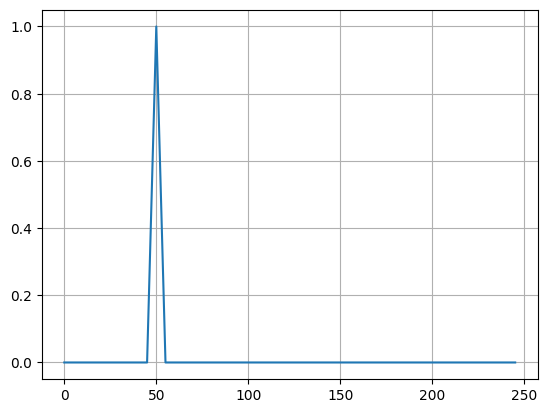

In [44]:
import matplotlib.pyplot as plt
plt.plot(xf, yf)                         # Graf amplitudového spektra
plt.grid()
plt.show()


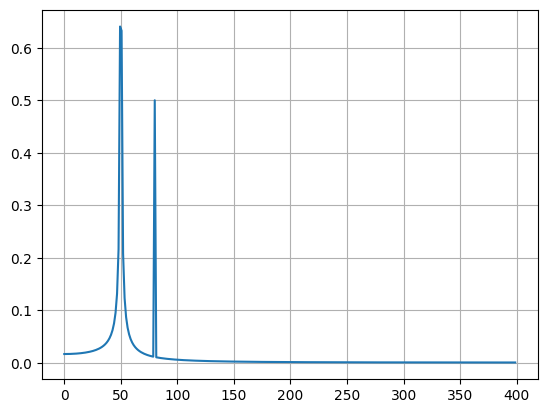

In [5]:
import numpy
from scipy.fft import fft, fftfreq
N = 600                     # počet vzorků
T = 1.0 / 800.0             # perioda
x = numpy.linspace(0.0, N*T, N, endpoint=False)
y = numpy.sin(50.0 * 2.0*numpy.pi*x) + 0.5*numpy.sin(80.0 * 2.0*numpy.pi*x)
yf = fft(y)                 # 1D diskrétní FFT
xf = fftfreq(N, T)[:N//2]   # frekvence FFT

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * numpy.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Fourierova transformace - příklad

Příprava signálu (v poli x)

In [12]:
import numpy as np

sr = 2000                   # vzorkovací frekvence (sampling rate)
ts = 1.0 / sr               # interval vzorkování (sampling interval)
t = np.arange(0, 1, ts)     # [0.0 až 0.995]

u1 = 3 * np.sin(2*np.pi*1*t)    # frekvence 1
u2 = 0
u3 = np.sin(2*np.pi*4*t)        # frekvence 4
u4 = 0
u5 = 0
u6 = 0
u7 = 0.5 * np.sin(2*np.pi*7*t)  # frekvence 7
x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Jiný signál

In [10]:
import numpy as np

t = np.linspace(0,1,1000)
sr = 1000

pi2 = np.pi/2
u1 = 0.81   * np.cos(2*np.pi*1*t - pi2)            # 8./pi/pi
u2 = 0
u3 = 0.09   * np.cos(2*np.pi*3*t + pi2)            # 8./3/3/pi/pi
u4 = 0
u5 = 0.0324 * np.cos(2*np.pi*5*t - pi2)            # 8./5/5/pi/pi
u6 = 0
u7 = 0.0165 * np.cos(2*np.pi*7*t + pi2)            # 8./7/7/pi/pi
x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Vykreslení signálu

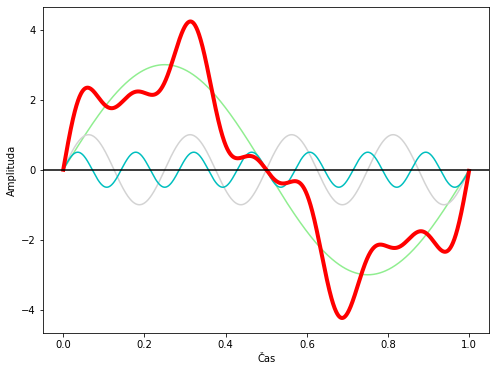

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
if type(u1) == np.ndarray: plt.plot(t, u1, color = 'lightgreen')
if type(u2) == np.ndarray: plt.plot(t, u2, 'b')
if type(u3) == np.ndarray: plt.plot(t, u3, color = 'lightgray')
if type(u4) == np.ndarray: plt.plot(t, u4, 'm')
if type(u5) == np.ndarray: plt.plot(t, u5, 'y')
if type(u6) == np.ndarray: plt.plot(t, u6, 'p')
if type(u7) == np.ndarray: plt.plot(t, u7, 'c')
plt.plot(t, x, 'r', linewidth = 4)

plt.axhline(y = 0, color='k')               # vykreslení osy x (osa y axvline)
plt.xlabel('Čas')
plt.ylabel('Amplituda')

plt.show()

Možno řešit pomocí knihovny NumPy nebo SciPy

In [14]:
from numpy.fft import fft, ifft         # pomalejší

In [15]:
from scipy.fftpack import fft, ifft     # rychlejší

FFT a inverzní FFT

C:\Users\P\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


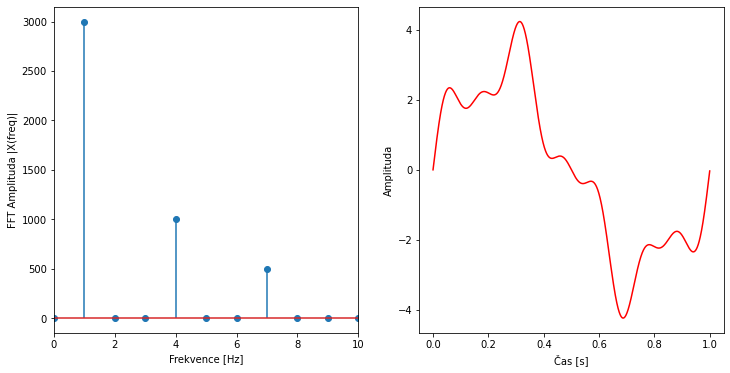

In [16]:
X = fft(x)                              # FFT, x z předch. příkladu
N = len(X)                              # 2000
n = np.arange(N)                        # [0 až 1999]
T = N/sr                                # 1.0   (sr vzorkovací frekvence)
freq = n/T                              # [0.0 až 1999.0]

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(X))
plt.xlabel('Frekvence [Hz]')
plt.ylabel('FFT Amplituda |X(freq)|')
plt.xlim(0, 10)                         # nastaví meze ody x

plt.subplot(122)
plt.plot(t, ifft(X), 'r')               # inverzní FFT
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
#plt.tight_layout()                      # jen kvůli rozložení grafů do obrázku
plt.show()

## Zpracování signálu

In [17]:
from scipy import signal, misc
import matplotlib.pyplot as plt
import numpy
print(type(misc.face()), len(misc.face()))                  # obrázek mývala 1024 x 768
image = misc.face(gray=True).astype(numpy.float32)
derfilt = numpy.array([1.0, -2, 1.0], dtype=numpy.float32)
derfilt

<class 'numpy.ndarray'> 768


array([ 1., -2.,  1.], dtype=float32)

separabilní konvoluce 2D signálu s 2D jádrem
- prováděno odděleně podle jednotlivých dimenzí
    - jádro se rozloží na dvě separabilní jádra (jedno pro každou dimenzi) 
    - provede se konvoluce s těmito jádry postupně podél každé dimenze
- snížení výpočetní náročnosti 

In [12]:
ck = signal.cspline2d(image, 8.0)                                               # 2D spline
deriv = (signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt)) # konvoluce (2D FIR)

In [13]:
laplacian = numpy.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=numpy.float32)      # jádro konvoluce
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')            # konvoluce

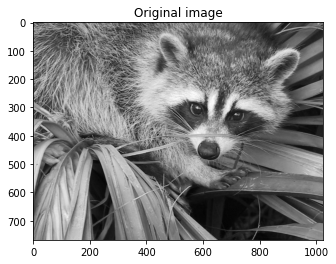

In [14]:
plt.figure()                                # nový obrázek
plt.imshow(image)                           # vykreslení pole image
plt.gray()                                  # šedá
plt.title('Original image')                 # nadpis
plt.show()

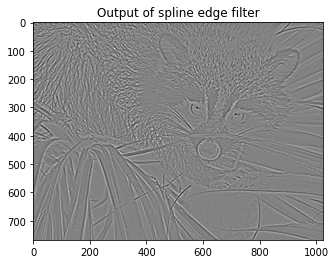

In [15]:
plt.figure()
plt.imshow(deriv2)                          # vykreslení pole deriv2
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

Uložení pole do obrázku (např. pomocí knihovny pillow nebo imgio)

In [ ]:
%pip install pillow
%pip install imgio

In [19]:
from scipy import misc
from PIL import Image
im = Image.fromarray(misc.face())
print("Předdefinované pole:", type(misc.face()))
print("Obrázek z pole:", type(im))

im.save("data/myval.jpg")                                   # uložení obrázku

import matplotlib.image
matplotlib.image.imsave('data/myval2.jpg', misc.face())     # uložení pole jako obr.

Předdefinované pole: <class 'numpy.ndarray'>
Obrázek z pole: <class 'PIL.Image.Image'>


Formát:  JPEG RGB
Typ: <class 'PIL.JpegImagePlugin.JpegImageFile'>


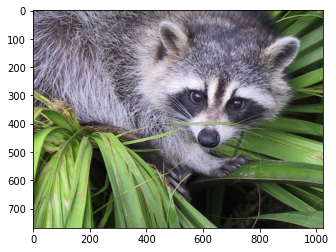

In [20]:
import matplotlib.pyplot as plt
im2 = Image.open('data/myval.jpg')              # načtení obrázku pomocí PIL
print("Formát: ", im2.format, im2.mode)
print("Typ:", type(im2))
plt.imshow(im2)
#im2.show()                                     # otevření v přidružené aplikaci

(768, 1024, 3) <class 'imageio.core.util.Array'>


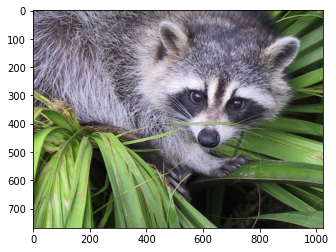

In [33]:
import imageio
img = imageio.imread('data/myval.jpg')      # načtení obrázku pomocí imageio
print(img.shape, type(img))
plt.imshow(img)

Přístup k barevným kanálům (poslední index)

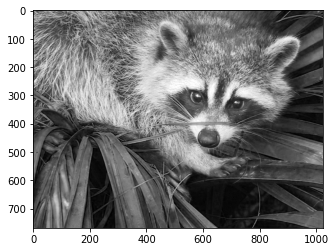

In [35]:
R = img[:, :, 0]
G = img[..., 1]                 # jiný zápis přes tři tečky
B = img[..., 2]                 # nebo -1
plt.imshow(B, cmap='gray')      # modrý kanál čb. (výchozí se nehodí)

## Lineární algebra


In [18]:
import numpy
from scipy import linalg
A = numpy.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)
linalg.inv(A), numpy.linalg.inv(A)          # stejné výsledky, ale scipy optimalizace

[[1 3 5]
 [2 5 1]
 [2 3 8]]


(array([[-1.48,  0.36,  0.88],
        [ 0.56,  0.08, -0.36],
        [ 0.16, -0.12,  0.04]]),
 array([[-1.48,  0.36,  0.88],
        [ 0.56,  0.08, -0.36],
        [ 0.16, -0.12,  0.04]]))

In [ ]:
A @ linalg.inv(A)

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

Řešení lineárních soustav

In [19]:
A = numpy.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [20]:
b = numpy.array([[5], [6]])
b

array([[5],
       [6]])

In [22]:
from scipy import linalg
linalg.inv(A).dot(b)                    # řešení rovnic pomalé, i když scipy
#display(linalg.inv(A)@b)                # totéž

array([[-4. ],
       [ 4.5]])

In [42]:
A.dot(linalg.inv(A).dot(b)) - b         # kontrola

array([[0.],
       [0.]])

In [45]:
print(numpy.linalg.solve(A, b))         # rychlé, i když numpy
print(linalg.solve(A, b) )              # rychlé (scipy)

[[-4. ]
 [ 4.5]]
[[-4. ]
 [ 4.5]]


In [ ]:
A.dot(numpy.linalg.solve(A, b)) - b     # kontrola

array([[0.],
       [0.]])

Výpočet deteminantu

In [46]:
from scipy import linalg
A = numpy.array([[1,2],[3,4]])
print(A)
linalg.det(A)                           # opět jako numpy

[[1 2]
 [3 4]]


-2.0

## Interpolace

In [21]:
# Definice časových bodů a příslušných cen
casove_body = [1, 2]            # Časové body
ceny_produktu = [100, 150]      # Ceny produktu odpovídající časovým bodům
cilovy_casovy_bod = 1.5         # Bod, pro který chceme provést interpolaci ceny

# Lineární interpolace
cilova_cena = np.interp(cilovy_casovy_bod, casove_body, ceny_produktu)
print(f"Interpolovaná cena produktu v časovém bodě {cilovy_casovy_bod} je {cilova_cena} Kč.")

Interpolovaná cena produktu v časovém bodě 1.5 je 125.0 Kč.


## Statistika

In [18]:
import numpy as np
from scipy import stats

# Střední hodnota a rozptyl pro skupiny A (lék) a B (placebo)
prumer_A = 195
prumer_B = 200
rozptyl = 20
osob = 10

# Generování dat pro skupiny A a B (normální rozdělení)
np.random.seed(0)           # pro reprodukovatelnost
skupina_A = np.random.normal(loc=prumer_A, scale=np.sqrt(rozptyl), size=osob)
skupina_B = np.random.normal(loc=prumer_B, scale=np.sqrt(rozptyl), size=osob)

# Provedení t-testu
t_statistika, p_hodnota = stats.ttest_ind(skupina_A, skupina_B)
print(t_statistika, p_hodnota)
# Provedení analýzy rozptylu (ANOVA)
statistika2, p_hodnota2 = stats.f_oneway(skupina_A, skupina_B)
print(statistika2, p_hodnota2)

# Interpretace výsledků
alpha = 0.05                # hladina významnosti
if p_hodnota < alpha:
    print("Rozdíl v obou skupinách je statisticky významný.")
else:
    print("Rozdíl v obou skupinách není statisticky významný.")

-1.9873559160858973 0.06231638121078746
3.9495835372015913 0.06231638121078818
Rozdíl v obou skupinách není statisticky významný.


In [43]:
from scipy.stats import norm
print(norm.pdf(0))  # Probability Density Function
norm.cdf(0)         # Cumulative Distribution Function

0.3989422804014327


0.5

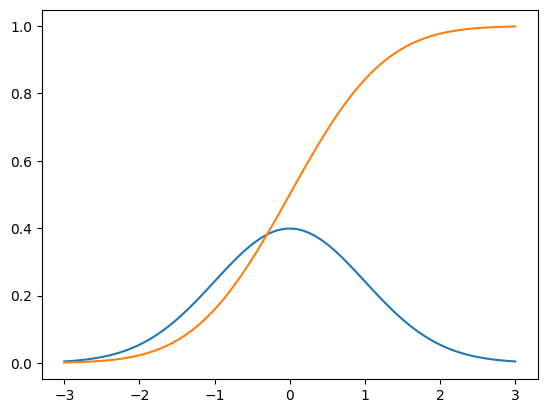

In [44]:
import matplotlib.pyplot as plt
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = numpy.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), x, norm.cdf(x, mu, sigma))
plt.show()